In [33]:
%matplotlib inline

In [34]:
import numpy as np
import os
import time

home = os.path.expanduser('~')

In [35]:
import matplotlib
import matplotlib.pyplot as plt

In [36]:
def plot_seg(seg, border=False):
    unique, unique_inverse = np.unique(seg, return_inverse=True)
    N = len(unique)
    cmap = np.random.rand(N,3)
    if border:
        cmap[0,:] = 0
    cmap = matplotlib.colors.ListedColormap(cmap)
    plt.imshow(np.arange(N)[unique_inverse].reshape(seg.shape), cmap=cmap)

# Basil-4K (mip1)

In [37]:
import evaluator

In [38]:
from types import SimpleNamespace

In [39]:
import h5py

## basil100

In [40]:
d = dict()

d['gs_input'] = 'gs://neuroglancer/kisuk/basil_v0/basil_4K/experiments/basil/round2/pretrain/lost_no-random/basil100/iter_220000/mip1/fov256-20/overlap25/precomputed/wu/aff'
d['dtype']   = 'float32'
d['in_mip']   = 0
d['begin']   = (58199,80712,496) 
d['end']     = None
d['center']  = None
d['size']    = (2048,2048,256)
d['cache']   = True
d['parallel'] = 8

opt = SimpleNamespace(**d)

In [8]:
%%capture
aff = evaluator.cutout(opt, dtype=opt.dtype)

In [9]:
print(aff.shape)

(3, 256, 2048, 2048)


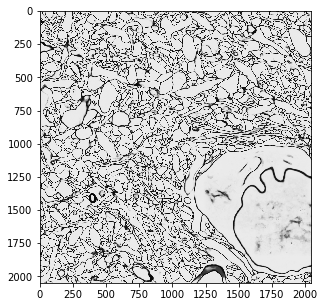

In [12]:
z = 126
plt.figure(figsize=(5,5))
plt.imshow(aff[0,z,:,:], cmap='gray')
plt.show()

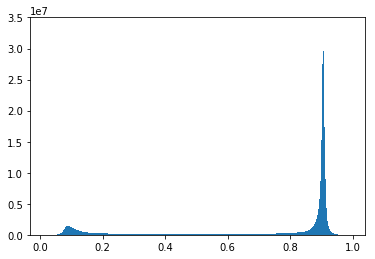

In [16]:
plt.hist(aff.ravel(), bins='auto')
plt.show()

In [20]:
dst = 'seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/basil100/iter_220000/fov256-20'
fname = 'basil-4k-mip1_dataset1_affinity.h5'
fpath = os.path.join(home, dst, fname)
print(fpath)

/usr/people/kisuk/Workbench/torms3/minnie-eval/models/basil100/iter_220000/basil-4k-mip1_dataset1_affinity.h5


In [21]:
with h5py.File(fpath, 'w') as f:
    f.create_dataset('/main', data=aff.astype(np.float32))

## interp-inv-820K

In [9]:
model = 'interp'
loss  = 'inv'
iters = 820000 
param = (model, loss, iters)
gs_path = 'gs://neuroglancer/kisuk/basil_v0/basil_4K/experiments/minnie/round3/minnie75/{}/aff1/{}/iter_{}/fov256-20/overlap25/precomputed/wu/aff'.format(*param)
print(gs_path)

gs://neuroglancer/kisuk/basil_v0/basil_4K/experiments/minnie/round3/minnie75/interp/aff1/inv/iter_820000/fov256-20/overlap25/precomputed/wu/aff


In [10]:
d['gs_input'] = gs_path
opt = SimpleNamespace(**d)

In [11]:
%%capture
aff = evaluator.cutout(opt, dtype=opt.dtype)

In [12]:
print(aff.shape)

(3, 256, 2048, 2048)


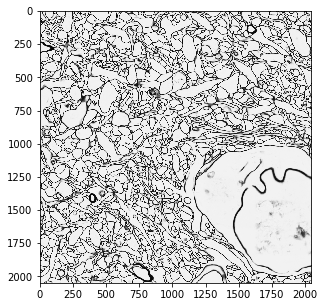

In [13]:
z = 126
plt.figure(figsize=(5,5))
plt.imshow(aff[0,z,:,:], cmap='gray')
plt.show()

In [14]:
dst = 'seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/{}/{}/iter_{}/fov256-20'.format(*param)
dst = os.path.join(home, dst)
print(dst)
os.makedirs(dst)

/usr/people/kisuk/seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/interp/inv/iter_820000/fov256-20


In [15]:
fname = 'basil-4k-mip1_dataset1_affinity.h5'
fpath = os.path.join(dst, fname)
print(fpath)

/usr/people/kisuk/seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/interp/inv/iter_820000/fov256-20/basil-4k-mip1_dataset1_affinity.h5


In [16]:
with h5py.File(fpath, 'w') as f:
    f.create_dataset('/main', data=aff.astype(np.float32))

## interp-inv-820K asymmetric

In [25]:
model = 'interp'
loss  = 'inv'
iters = 820000 
param = (model, loss, iters)
gs_path = 'gs://neuroglancer/kisuk/basil_v0/basil_4K/experiments/minnie/round3/minnie75/{}/aff1/{}/iter_{}/fov256-20/overlap25/precomputed/wu/asym/aff'.format(*param)
print(gs_path)

gs://neuroglancer/kisuk/basil_v0/basil_4K/experiments/minnie/round3/minnie75/interp/aff1/inv/iter_820000/fov256-20/overlap25/precomputed/wu/asym/aff


In [26]:
d['gs_input'] = gs_path
opt = SimpleNamespace(**d)

In [27]:
%%capture
aff = evaluator.cutout(opt, dtype=opt.dtype)

In [28]:
print(aff.shape)

(3, 256, 2048, 2048)


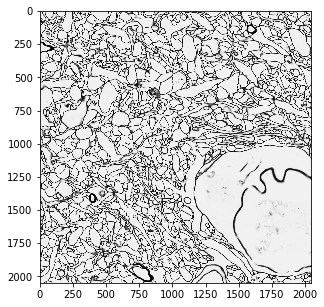

In [29]:
z = 126
plt.figure(figsize=(5,5))
plt.imshow(aff[0,z,:,:], cmap='gray')
plt.show()

In [30]:
dst = 'seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/{}/{}/iter_{}/fov256-20/asym/'.format(*param)
dst = os.path.join(home, dst)
print(dst)
os.makedirs(dst)

/usr/people/kisuk/seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/interp/inv/iter_820000/fov256-20/asym/


In [31]:
fname = 'basil-4k-mip1_dataset1_affinity.h5'
fpath = os.path.join(dst, fname)
print(fpath)

/usr/people/kisuk/seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/interp/inv/iter_820000/fov256-20/asym/basil-4k-mip1_dataset1_affinity.h5


In [32]:
with h5py.File(fpath, 'w') as f:
    f.create_dataset('/main', data=aff.astype(np.float32))

## interp-inv2-630K

In [17]:
model = 'interp'
loss  = 'inv2'
iters = 630000 
param = (model, loss, iters)
gs_path = 'gs://neuroglancer/kisuk/basil_v0/basil_4K/experiments/minnie/round3/minnie75/{}/aff1/{}/iter_{}/fov256-20/overlap25/precomputed/wu/aff'.format(*param)
print(gs_path)

gs://neuroglancer/kisuk/basil_v0/basil_4K/experiments/minnie/round3/minnie75/interp/aff1/inv2/iter_630000/fov256-20/overlap25/precomputed/wu/aff


In [18]:
d['gs_input'] = gs_path
opt = SimpleNamespace(**d)

In [19]:
%%capture
aff = evaluator.cutout(opt, dtype=opt.dtype)

gs://neuroglancer/kisuk/basil_v0/basil_4K/experiments/minnie/round3/minnie75/interp/aff1/inv2/iter_630000/fov256-20/overlap25/precomputed/wu/aff
begin = (58199, 80712, 496)
end = (60247, 82760, 752)
mip 0 = [slice(58199, 60247, None), slice(80712, 82760, None), slice(496, 752, None)]
mip 0 = (slice(58199, 60247, None), slice(80712, 82760, None), slice(496, 752, None))


Downloading: 4350it [15:15,  3.58it/s]                          
Downloading: 4350it [15:47,  2.28it/s]                          
Downloading: 4348it [16:02,  5.47it/s]                          
Downloading: 4350it [16:08,  6.69it/s]                          
Downloading: 4350it [16:18,  5.58it/s]                          
Downloading: 4350it [16:21,  7.22it/s]                          
Downloading: 4348it [16:22,  4.34it/s]                          
Downloading: 4350it [16:25, 13.11it/s]                          


In [20]:
print(aff.shape)

(3, 256, 2048, 2048)


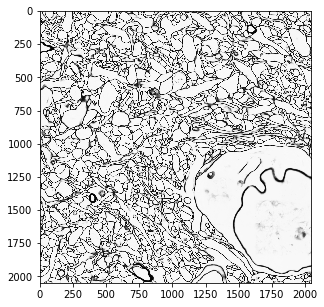

In [21]:
z = 126
plt.figure(figsize=(5,5))
plt.imshow(aff[0,z,:,:], cmap='gray')
plt.show()

In [22]:
dst = 'seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/{}/{}/iter_{}/fov256-20'.format(*param)
dst = os.path.join(home, dst)
print(dst)
os.makedirs(dst)

/usr/people/kisuk/seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/interp/inv2/iter_630000/fov256-20


In [23]:
fname = 'basil-4k-mip1_dataset1_affinity.h5'
fpath = os.path.join(dst, fname)
print(fpath)

/usr/people/kisuk/seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/interp/inv2/iter_630000/fov256-20/basil-4k-mip1_dataset1_affinity.h5


In [24]:
with h5py.File(fpath, 'w') as f:
    f.create_dataset('/main', data=aff.astype(np.float32))

## no_interp-inv-890K

In [41]:
model = 'no_interp'
loss  = 'inv'
iters = 890000 
param = (model, loss, iters)
gs_path = 'gs://neuroglancer/kisuk/basil_v0/basil_4K/experiments/minnie/round3/minnie75/{}/aff1/{}/iter_{}/fov256-20/overlap64-4/precomputed/wu/aff'.format(*param)
print(gs_path)

gs://neuroglancer/kisuk/basil_v0/basil_4K/experiments/minnie/round3/minnie75/no_interp/aff1/inv/iter_890000/fov256-20/overlap64-4/precomputed/wu/aff


In [42]:
d['gs_input'] = gs_path
opt = SimpleNamespace(**d)

In [43]:
%%capture
aff = evaluator.cutout(opt, dtype=opt.dtype)

In [44]:
print(aff.shape)

(3, 256, 2048, 2048)


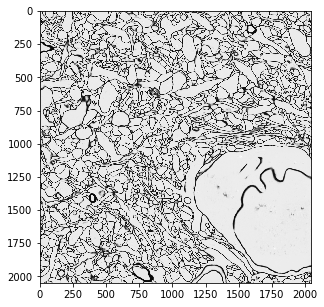

In [45]:
z = 126
plt.figure(figsize=(5,5))
plt.imshow(aff[0,z,:,:], cmap='gray')
plt.show()

In [46]:
dst = 'seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/{}/{}/iter_{}/fov256-20'.format(*param)
dst = os.path.join(home, dst)
print(dst)
os.makedirs(dst)

/usr/people/kisuk/seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/no_interp/inv/iter_890000/fov256-20


In [47]:
fname = 'basil-4k-mip1_dataset1_affinity.h5'
fpath = os.path.join(dst, fname)
print(fpath)

/usr/people/kisuk/seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/no_interp/inv/iter_890000/fov256-20/basil-4k-mip1_dataset1_affinity.h5


In [48]:
with h5py.File(fpath, 'w') as f:
    f.create_dataset('/main', data=aff.astype(np.float32))

## no_interp-inv2-660K

In [49]:
model = 'no_interp'
loss  = 'inv2'
iters = 660000 
param = (model, loss, iters)
gs_path = 'gs://neuroglancer/kisuk/basil_v0/basil_4K/experiments/minnie/round3/minnie75/{}/aff1/{}/iter_{}/fov256-20/overlap64-4/precomputed/wu/aff'.format(*param)
print(gs_path)

gs://neuroglancer/kisuk/basil_v0/basil_4K/experiments/minnie/round3/minnie75/no_interp/aff1/inv2/iter_660000/fov256-20/overlap64-4/precomputed/wu/aff


In [50]:
d['gs_input'] = gs_path
opt = SimpleNamespace(**d)

In [51]:
%%capture
aff = evaluator.cutout(opt, dtype=opt.dtype)

In [52]:
print(aff.shape)

(3, 256, 2048, 2048)


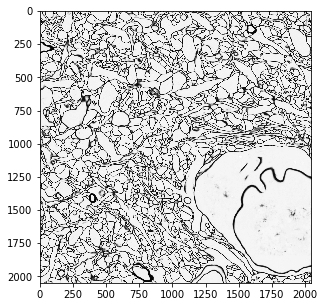

In [53]:
z = 126
plt.figure(figsize=(5,5))
plt.imshow(aff[0,z,:,:], cmap='gray')
plt.show()

In [54]:
dst = 'seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/{}/{}/iter_{}/fov256-20'.format(*param)
dst = os.path.join(home, dst)
print(dst)
os.makedirs(dst)

/usr/people/kisuk/seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/no_interp/inv2/iter_660000/fov256-20


In [55]:
fname = 'basil-4k-mip1_dataset1_affinity.h5'
fpath = os.path.join(dst, fname)
print(fpath)

/usr/people/kisuk/seungmount/research/kisuklee/Workbench/torms3/minnie-eval/models/minnie75/no_interp/inv2/iter_660000/fov256-20/basil-4k-mip1_dataset1_affinity.h5


In [56]:
with h5py.File(fpath, 'w') as f:
    f.create_dataset('/main', data=aff.astype(np.float32))

# Pinky-golden (mip1)

## basil25

In [43]:
d = dict()

d['gs_input'] = 'gs://neuroglancer/kisuk/pinky/golden/experiments/basil/round2/pretrain/lost_no-random/basil25/iter_730000/mip1/fov256-20/aff'
d['dtype']   = 'float32'
d['in_mip']   = 0
d['begin']   = (0,0,0) 
d['end']     = None
d['center']  = None
d['size']    = (1024,1024,256)
d['cache']   = True
d['parallel'] = 8

opt = SimpleNamespace(**d)

In [44]:
%%capture
aff = evaluator.cutout(opt, dtype=opt.dtype)

In [45]:
print(aff.shape)

(3, 256, 1024, 1024)


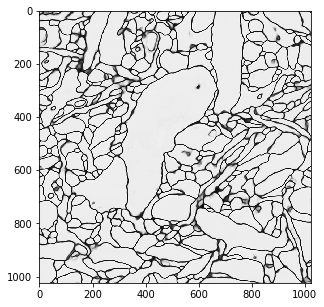

In [46]:
z = 126
plt.figure(figsize=(5,5))
plt.imshow(aff[0,z,:,:], cmap='gray')
plt.show()

In [47]:
dst = 'Workbench/torms3/minnie-eval/models/basil25/iter_730000/fov256-20'
dst = os.path.join(home, dst)
os.makedirs(dst)

fname = 'pinky-golden-mip1_dataset1_affinity.h5'
fpath = os.path.join(dst, fname)
print(fpath)

/usr/people/kisuk/Workbench/torms3/minnie-eval/models/basil25/iter_220000/fov256-20/pinky-golden-mip1_dataset1_affinity.h5


In [48]:
with h5py.File(fpath, 'w') as f:
    f.create_dataset('/main', data=aff.astype(np.float32))

## interp

In [49]:
d['gs_input'] = 'gs://neuroglancer/kisuk/pinky/golden/experiments/minnie/round1/pinky50_basil50/mip1/depth4_width16/patch256-20/aff1_mye1_blv1/interp/inv/iter_550000/mip1/fov256-20/aff'
opt = SimpleNamespace(**d)

In [50]:
%%capture
aff = evaluator.cutout(opt, dtype=opt.dtype)

In [51]:
print(aff.shape)

(3, 256, 1024, 1024)


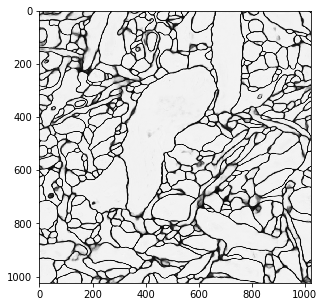

In [52]:
z = 126
plt.figure(figsize=(5,5))
plt.imshow(aff[0,z,:,:], cmap='gray')
plt.show()

In [53]:
dst = 'Workbench/torms3/minnie-eval/models/pinky50_basil50_interp/iter_550000/fov256-20'
dst = os.path.join(home, dst)

fname = 'pinky-golden-mip1_dataset1_affinity.h5'
fpath = os.path.join(dst, fname)
print(fpath)

/usr/people/kisuk/Workbench/torms3/minnie-eval/models/pinky50_basil50_interp/iter_550000/fov256-20/pinky-golden-mip1_dataset1_affinity.h5


In [54]:
with h5py.File(fpath, 'w') as f:
    f.create_dataset('/main', data=aff.astype(np.float32))

## no-interp

In [55]:
d['gs_input'] = 'gs://neuroglancer/kisuk/pinky/golden/experiments/minnie/round1/pinky50_basil50/mip1/depth4_width16/patch256-20/aff1_mye1_blv1/inv/iter_540000/fov256-20/aff'
opt = SimpleNamespace(**d)

In [56]:
%%capture
aff = evaluator.cutout(opt, dtype=opt.dtype)

In [57]:
print(aff.shape)

(3, 256, 1024, 1024)


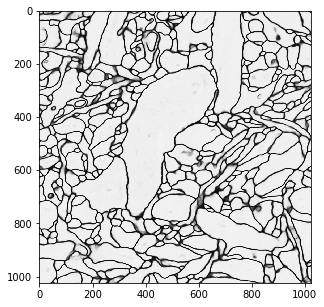

In [58]:
z = 126
plt.figure(figsize=(5,5))
plt.imshow(aff[0,z,:,:], cmap='gray')
plt.show()

In [59]:
dst = 'Workbench/torms3/minnie-eval/models/pinky50_basil50/iter_540000/fov256-20'
dst = os.path.join(home, dst)

fname = 'pinky-golden-mip1_dataset1_affinity.h5'
fpath = os.path.join(dst, fname)
print(fpath)

/usr/people/kisuk/Workbench/torms3/minnie-eval/models/pinky50_basil50/iter_540000/fov256-20/pinky-golden-mip1_dataset1_affinity.h5


In [60]:
with h5py.File(fpath, 'w') as f:
    f.create_dataset('/main', data=aff.astype(np.float32))